<a href="https://colab.research.google.com/github/GersteinJo/Chair_programming_class/blob/main/pytorch.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [139]:
import torch
import numpy as np

In [140]:
 tensor_3d = torch.randn(3, 4, 5)
 tensor_3d

tensor([[[-0.0982,  0.3841, -1.8034,  1.7807, -0.3333],
         [-2.0240,  0.3320,  0.2886, -1.4908,  1.1009],
         [-0.5156, -0.5295, -0.0692,  1.4765, -0.5292],
         [-0.6222, -3.0965, -0.2728, -0.7576,  0.4796]],

        [[ 0.9073,  1.3944, -0.7895,  0.5470,  0.8095],
         [-0.3406,  0.3339,  0.0103, -0.4788, -1.1443],
         [-1.0989, -0.4295,  0.0039,  1.1267, -0.1914],
         [ 0.3347,  1.8397,  0.0979,  0.8336,  0.9328]],

        [[-0.4568, -0.4488, -0.8851,  0.6997, -0.0714],
         [ 1.6807,  0.4799, -1.8880,  1.4126, -1.4238],
         [ 0.3318,  1.8289, -0.1702, -0.0099,  2.4015],
         [ 0.6971, -0.2976, -0.9196, -1.1756, -1.1829]]])

In [141]:
np_arr = np.random.rand(3, 4)
torch_np = torch.tensor(np_arr)
torch_np.dtype, tensor_3d.dtype

(torch.float64, torch.float32)

In [142]:
##tensor operations

my_torch = torch.arange(10)
my_torch2 = my_torch.reshape(2, 5)
my_torch3 = my_torch.view(2, -1)

my_torch3[1, 2] = 1000
my_torch, my_torch2
my_torch[-1]

tensor(9)

In [143]:
my_torch3 = my_torch2 - my_torch3

In [144]:
my_torch3

tensor([[0, 0, 0, 0, 0],
        [0, 0, 0, 0, 0]])

In [145]:
my_torch3[1, 3] = 15
my_torch2

tensor([[   0,    1,    2,    3,    4],
        [   5,    6, 1000,    8,    9]])

In [146]:
##basic neural network with torch

import torch.nn as nn
import torch.nn.functional as F


In [147]:
class Model(nn.Module):
  def __init__(self, in_features = 4, h1= 8, h2 = 9, out_features = 3):
    super().__init__()

    self.fc1 = nn.Linear(in_features, h1)
    self.act1 = nn.ReLU()
    self.fc2 = nn.Linear(h1, h2)
    self.act2 = nn.ReLU()
    self.fc3 = nn.Linear(h2, out_features)
    self.act3 = nn.Softmax()

  def forward(self, x):
    x = self.fc1(x)
    x = self.act1(x)
    x = self.fc2(x)
    x = self.act2(x)
    x = self.fc3(x)
    # x = self.act3(x)
    return x





In [148]:
#randomization seed
# torch.manual.seed(41)
model = Model()

In [149]:
import matplotlib.pyplot as plt
import pandas as pd
%matplotlib inline

In [150]:
from sklearn import datasets
my_df = datasets.load_iris()
x = my_df.data
y = my_df.target

In [151]:
from sklearn.model_selection import train_test_split
x_train,x_test,  y_train, y_test = train_test_split(x, y, random_state = 41)
x_train = torch.FloatTensor(x_train)
x_test = torch.FloatTensor(x_test)
y_train = torch.LongTensor(y_train)
y_test = torch.LongTensor(y_test)

In [152]:
criterion = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(model.parameters(), lr = 0.01)

In [153]:
epochs = 200
losses = []
for i in range(epochs):
  y_pred = model.forward(x_train)
  loss = criterion(y_pred, y_train)
  losses.append(loss.detach().numpy())
  if i%10==0:
    print(f'Epoch: {i}, loss: {loss}')

  optimizer.zero_grad()
  loss.backward()
  optimizer.step()

Epoch: 0, loss: 1.249215006828308
Epoch: 10, loss: 0.8164790868759155
Epoch: 20, loss: 0.5313937067985535
Epoch: 30, loss: 0.39561915397644043
Epoch: 40, loss: 0.29955917596817017
Epoch: 50, loss: 0.15857639908790588
Epoch: 60, loss: 0.09088288247585297
Epoch: 70, loss: 0.06370467692613602
Epoch: 80, loss: 0.05136927589774132
Epoch: 90, loss: 0.04431280121207237
Epoch: 100, loss: 0.0395493321120739
Epoch: 110, loss: 0.0359850749373436
Epoch: 120, loss: 0.033127591013908386
Epoch: 130, loss: 0.030758948996663094
Epoch: 140, loss: 0.028744027018547058
Epoch: 150, loss: 0.02700103260576725
Epoch: 160, loss: 0.025472715497016907
Epoch: 170, loss: 0.024115214124321938
Epoch: 180, loss: 0.0228962954133749
Epoch: 190, loss: 0.021790653467178345


Text(0, 0.5, 'loss')

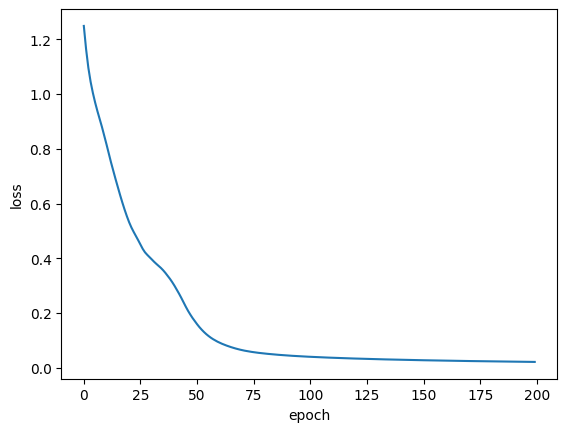

In [154]:
plt.plot(range(epochs), losses)
plt.xlabel("epoch")
plt.ylabel("loss")

In [155]:
with torch.no_grad():
  y_pred = model.forward(x_test)
  loss = criterion(y_pred, y_test)
loss

tensor(0.1487)

In [156]:
correct = 0
with torch.no_grad():
  for i, dat in enumerate(x_test):
    y_pred = model.forward(dat)
    if y_pred.argmax().item() != y_test[i]:
      print(f'{i+1}). {str(y_pred)} \t {y_test[i]}')


16). tensor([-6.5810,  3.7727,  3.2071]) 	 2
18). tensor([-8.0398,  2.0206,  6.2744]) 	 1


In [157]:
##adding data

new_iris = torch.tensor([4.7, 3.2, 1.3, 0.2])
with torch.no_grad():
  print(model(new_iris).argmax().item())

0


In [158]:
#saving model
torch.save(model.state_dict(), "my_model.pt")

In [159]:
new_model = Model()
new_model.load_state_dict(torch.load("my_model.pt"))
# with torch.no_grad():
#   print(new_model(new_iris).argmax().item())

new_model.eval()

Model(
  (fc1): Linear(in_features=4, out_features=8, bias=True)
  (act1): ReLU()
  (fc2): Linear(in_features=8, out_features=9, bias=True)
  (act2): ReLU()
  (fc3): Linear(in_features=9, out_features=3, bias=True)
  (act3): Softmax(dim=None)
)

In [162]:
##CNN
import torch
import torch.nn as nn
import torch.nn.functional as F
from torch.utils.data import dataloader
from torchvision import datasets, transforms
from torchvision.utils import make_grid

import numpy as np
import pandas as pd
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
%matplotlib inline

In [165]:
#converting mnist into a 4d tensor (images, height, width, color)
transform = transforms.ToTensor()

#test dat
train_data = datasets.MNIST(root = "cnn data", train=True, download=True, transform=transform)
#test
test_data = datasets.MNIST(root = "cnn data", train=False, download=True, transform=transform)

In [ ]:
train_loader = dataloader(train_data, batch_size = 10, shuffle = True)
test_loader = dataloader(test_data, batch_size = 10, shuffle = True)